In [62]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import ast
import seaborn as sns
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [113]:
df_filter = df[df['job_country'] == 'India'].dropna(subset='salary_year_avg')

In [114]:
df_titles = df_filter['job_title_short'].value_counts()
df_titles = df_titles.sort_values(ascending=False).index[:6].to_list()
df_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

In [115]:
df_top6 = df_filter[df_filter['job_title_short'].isin(df_titles)]


In [116]:
df_order = df_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

<function matplotlib.pyplot.show(close=None, block=None)>

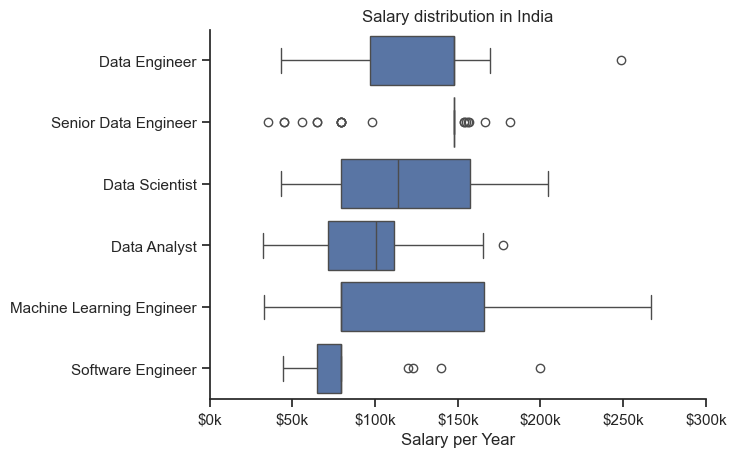

In [130]:
sns.set_theme(style='ticks')
sns.boxplot(data=df_top6, x="salary_year_avg",y='job_title_short',order=df_order )
plt.ylabel('')
plt.xlabel('Salary per Year')
plt.title('Salary distribution in India')
ticks_x = plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}k')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.xlim(0,300000)
sns.despine()
plt.show